In [1]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#ML related libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading data & data pre-processing

In [2]:
df=pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lets check how many NaNs we have:

In [5]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
df.shape

(1460, 81)

It is better to drop the following columns as they have almost the same number of NaNs as the deta set shape

In [7]:
df.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],inplace=True)

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

Now we remove the remaining rows which contain NaNs

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

lets check data types:

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


# Helper Functions:

In [12]:
def mean(col): #function that aggeregates and shows the means
    return df.groupby(col).mean().transpose()

In [13]:
def count(col): #function to count the number of examples for each desired category
    return df[col].value_counts()

In [14]:
def joint(col1,col2): #function to visualise the joint plot
    ax=sns.jointplot(x=col1, y=col2, data=df, kind="kde")
    return ax

In [15]:
def correlation(df,size1,size2,cmap): #function to create the correlation matrix
    corr=df.corr()
    plt.figure(figsize=(size1,size2))
    ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap=cmap,annot=True)
    return ax

In [16]:
def correlation_remove(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [17]:
def dist_plot(df,col):
    plt.figure(figsize=(15,10))
    plt.tight_layout()
    return sns.distplot(df[col])

In [18]:
def count_plot(col,hue):
    return sns.countplot(x=col, hue=hue, data=df)

In [19]:
def cat_plot(colx,hue,col,h,asp):
    return sns.catplot(x=colx, hue=hue, col=col,data=df, kind="count",height=h, aspect=asp)

# Some Statistics

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,606.117002,1099.561243,1173.809872,356.536563,4.680987,1535.027422,0.423218,0.056673,1.577697,0.389397,2.861974,1.033821,6.570384,0.610603,1978.565814,1.879342,503.760512,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,445.834636,415.851262,387.677463,439.260130,42.099821,526.124028,0.514253,0.235244,0.550219,0.500793,0.764107,0.185841,1.584486,0.633118,25.934444,0.658586,192.261314,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,270.000000,816.000000,894.000000,0.000000,0.000000,1164.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,525.000000,1023.000000,1097.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1982.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,846.000000,1345.500000,1413.500000,729.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,602.500000,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [21]:
mean('LotShape')

LotShape,IR1,IR2,IR3,Reg
Id,719.574751,609.076923,835.285714,733.518421
MSSubClass,50.614618,51.730769,44.285714,58.572368
LotFrontage,76.418605,76.500000,138.428571,67.698684
LotArea,11532.584718,17943.538462,51478.428571,8929.734211
OverallQual,6.843854,6.961538,7.000000,5.980263
OverallCond,5.445183,5.461538,5.000000,5.636842
YearBuilt,1985.674419,1986.423077,1987.285714,1966.543421
YearRemodAdd,1993.073090,1998.807692,1998.714286,1982.522368
MasVnrArea,149.179402,141.346154,113.714286,93.168421
BsmtFinSF1,526.591362,434.538462,1208.714286,410.603947


In [22]:
mean('Neighborhood')

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,805.642857,778.5,685.800000,731.238095,521.272727,714.352459,775.780488,793.184615,810.693878,614.555556,669.4,608.200000,748.046243,782.000000,839.244444,776.545455,596.202703,711.447917,841.368421,752.068182,666.090909,748.560000,637.20,789.172414,507.857143
MSSubClass,112.857143,160.0,160.000000,54.642857,50.909091,38.811475,62.926829,58.076923,55.918367,46.111111,158.0,54.500000,38.670520,148.571429,40.777778,54.545455,62.432432,66.093750,55.000000,40.568182,59.318182,69.866667,72.00,34.827586,71.428571
LotFrontage,47.142857,24.0,21.600000,58.761905,78.818182,71.901639,71.804878,70.476923,79.877551,60.925926,31.2,67.700000,77.369942,32.285714,81.288889,91.878788,81.500000,62.875000,59.210526,75.159091,72.568182,64.653333,62.70,80.379310,59.714286
LotArea,3450.357143,1625.0,1809.066667,7578.166667,23521.000000,9805.934426,10629.317073,10499.676923,12015.734694,8545.333333,2648.6,10893.533333,9961.468208,2793.000000,11322.155556,14058.181818,10955.270270,8511.093750,8044.421053,9977.568182,10007.750000,8229.560000,11942.15,20475.103448,16513.857143
OverallQual,7.142857,6.0,5.666667,5.428571,6.272727,6.647541,6.219512,5.369231,6.612245,4.629630,4.6,5.633333,5.462428,6.000000,6.400000,7.909091,8.256757,5.406250,5.473684,5.068182,6.431818,7.426667,8.25,7.379310,7.142857
OverallCond,5.000000,6.0,5.466667,6.523810,5.727273,5.221311,6.536585,5.538462,5.081633,5.481481,5.1,5.566667,5.867052,5.571429,5.755556,5.181818,5.000000,6.354167,5.684211,5.795455,5.136364,5.026667,5.00,5.034483,6.142857
YearBuilt,2005.642857,1980.0,1971.466667,1929.190476,1967.727273,1998.278689,1939.536585,1961.015385,1999.653061,1929.555556,1973.1,1981.933333,1959.583815,1976.571429,1976.888889,1995.545455,2005.743243,1922.729167,1927.736842,1964.750000,1989.022727,2005.266667,2001.90,1996.793103,1984.714286
YearRemodAdd,2006.214286,1980.0,1973.800000,1970.642857,1983.818182,1999.409836,1979.902439,1976.030769,2000.306122,1961.111111,1976.3,1986.066667,1972.000000,1976.571429,1982.088889,1996.757576,2006.243243,1975.166667,1968.526316,1977.727273,1990.477273,2005.600000,2002.35,1997.241379,1992.285714
MasVnrArea,49.928571,0.0,312.333333,6.380952,69.727273,86.081967,45.975610,56.169231,32.224490,0.000000,8.0,44.900000,112.566474,0.000000,160.800000,465.969697,336.702703,16.708333,13.263158,36.750000,74.931818,150.813333,228.45,162.275862,51.428571
BsmtFinSF1,238.000000,183.0,267.133333,208.166667,590.727273,436.942623,451.951220,483.000000,211.857143,131.666667,498.7,684.533333,500.352601,417.142857,491.800000,845.727273,691.108108,176.625000,241.631579,526.590909,481.204545,307.600000,859.65,726.965517,969.571429


RoofStyle=Hip has the highest SalePrice mean.

In [23]:
mean('RoofStyle')

RoofStyle,Flat,Gable,Gambrel,Hip,Mansard
Id,630.4,719.965599,636.9,768.269565,432.500000
MSSubClass,20.0,58.819692,65.0,46.565217,60.000000
LotFrontage,126.2,68.174377,59.2,79.278261,80.500000
LotArea,23668.4,9410.390273,9536.4,12477.834783,11370.000000
OverallQual,6.8,6.105575,5.5,6.795652,6.000000
OverallCond,6.6,5.578885,7.0,5.460870,6.333333
YearBuilt,1964.4,1971.621590,1929.7,1978.160870,1941.000000
YearRemodAdd,1991.0,1985.491103,1981.0,1987.560870,1986.500000
MasVnrArea,0.0,81.173191,8.2,220.621739,154.666667
BsmtFinSF1,620.8,388.225386,181.5,683.704348,146.166667


Lot price and Sale price does not seem to have a positive correlation

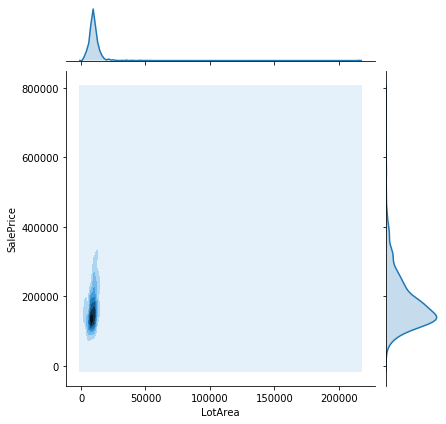

In [24]:
joint('LotArea','SalePrice')

Garage Area and Sale Price show some positive correlation. In addition, we have most examples around garage area equal to 200 and 600 and price renge less than 200000

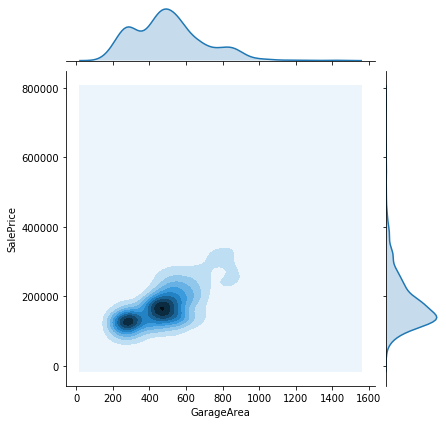

In [25]:
joint('GarageArea','SalePrice')

Year built show a very small positive correlation with price. However, we can conclude that newly built properties have higher prices. Most properties are built between 1950-1975 and around 2000.

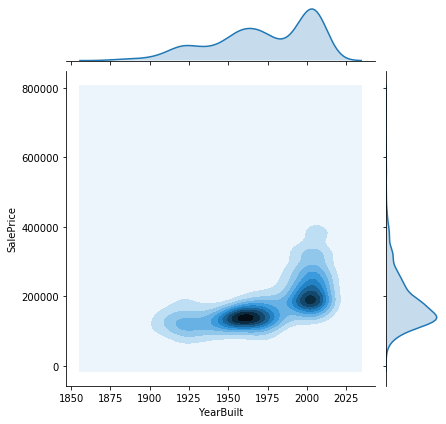

In [26]:
joint('YearBuilt','SalePrice')

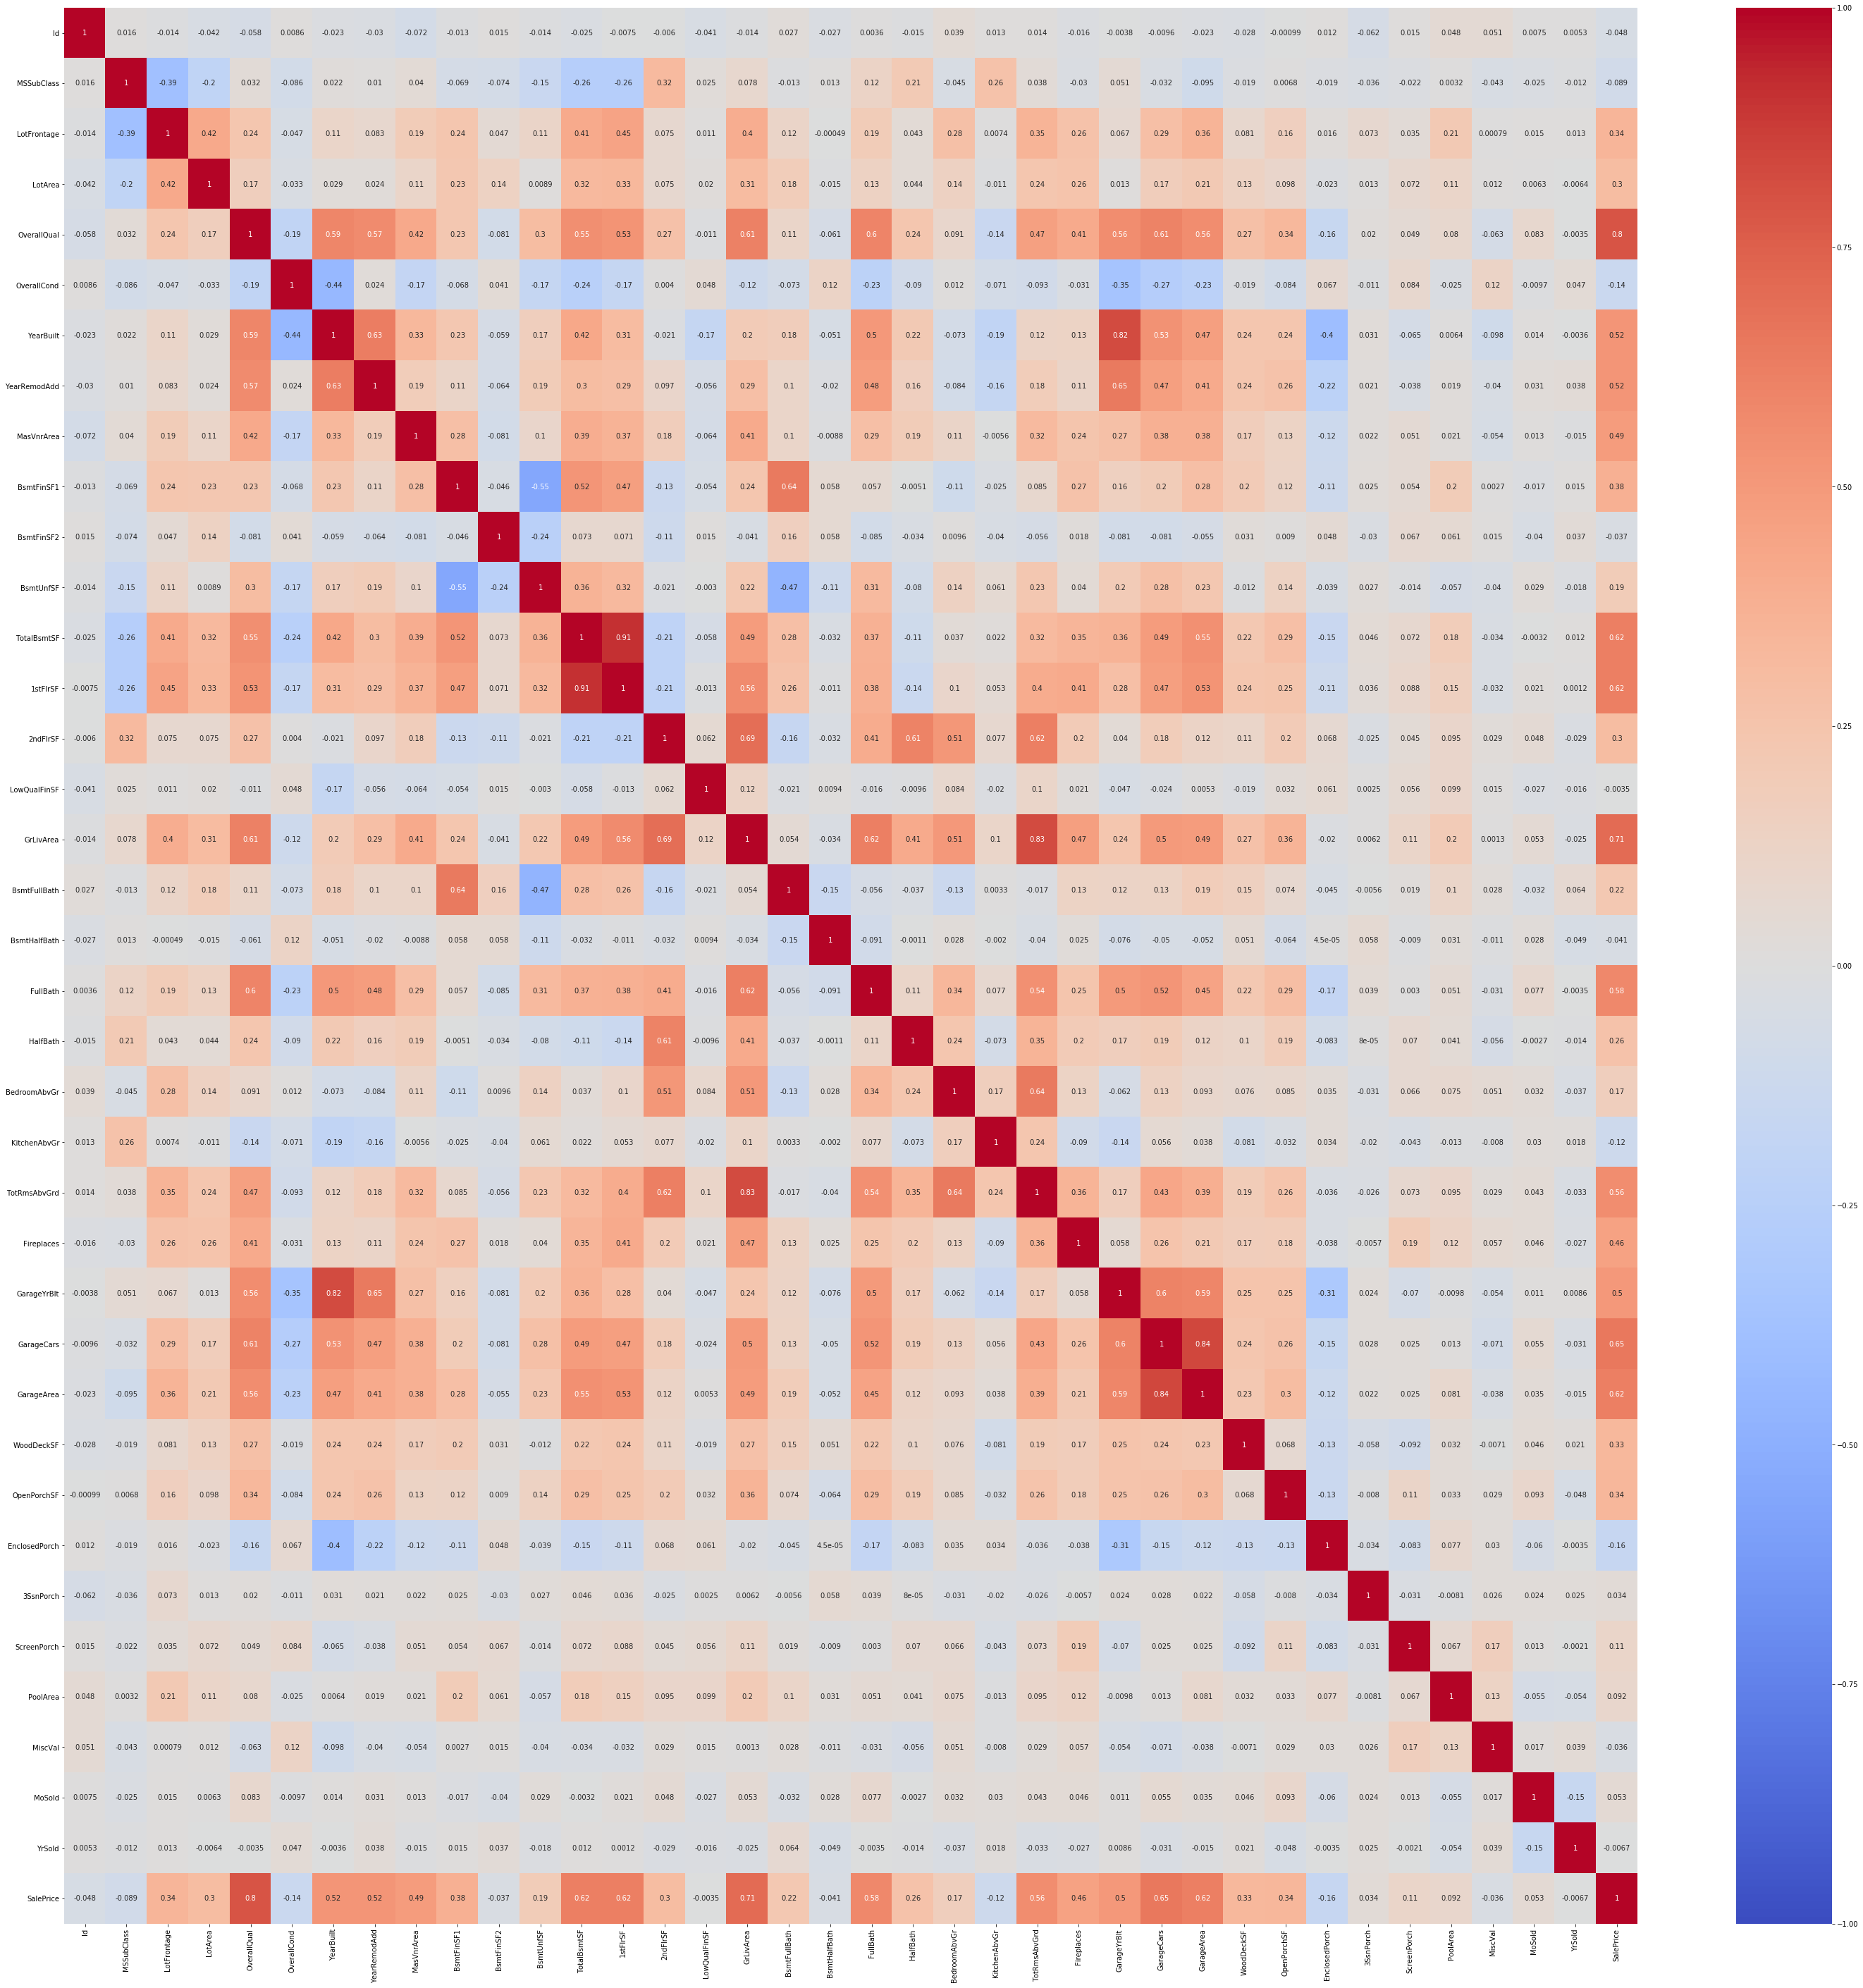

In [27]:
correlation(df,50,50, 'coolwarm')

from the above correlation matrix we can see that sale price has high correlation with OverallQual, TotalBsmtSF, garage area and garage cars. We can also see that sale price has a negaive correlation with enclosed porch. Let's visualise the distributions of the sale price and its highly corelated columns:

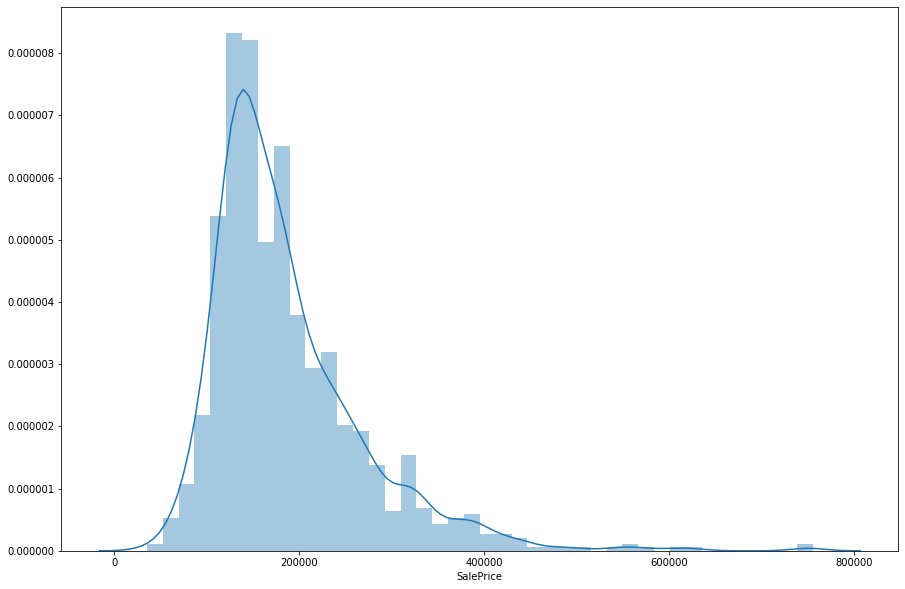

In [28]:
dist_plot(df,'SalePrice')

The price distribution is skewed to left.

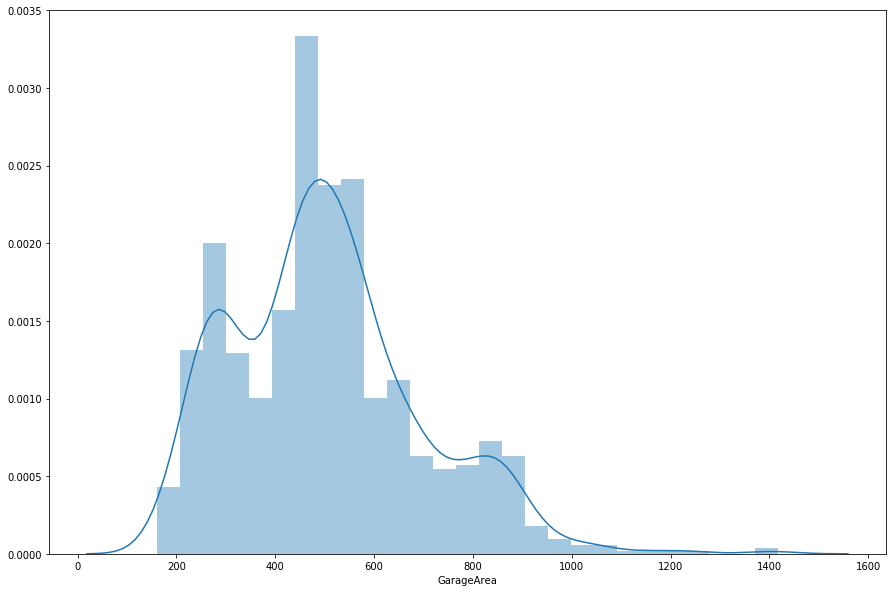

In [29]:
dist_plot(df,'GarageArea')

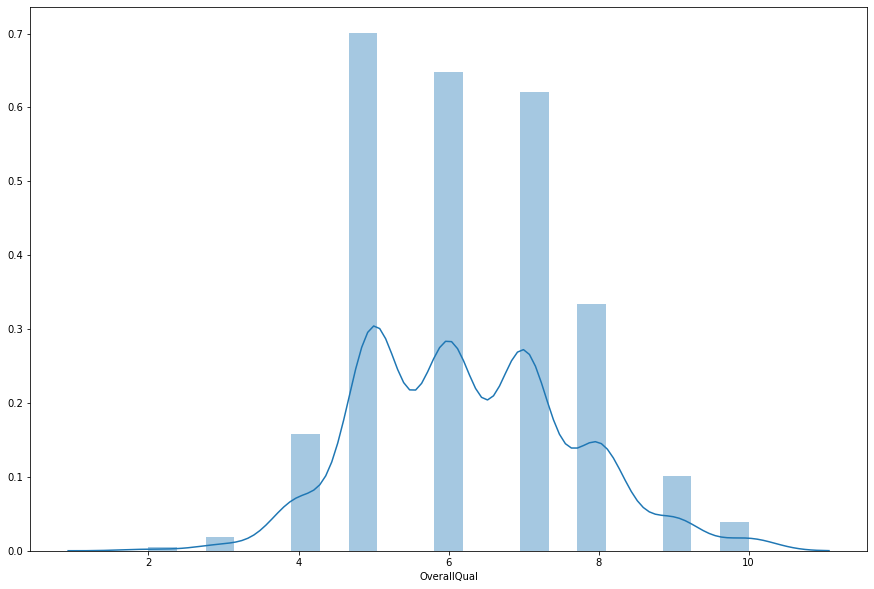

In [30]:
dist_plot(df,'OverallQual')

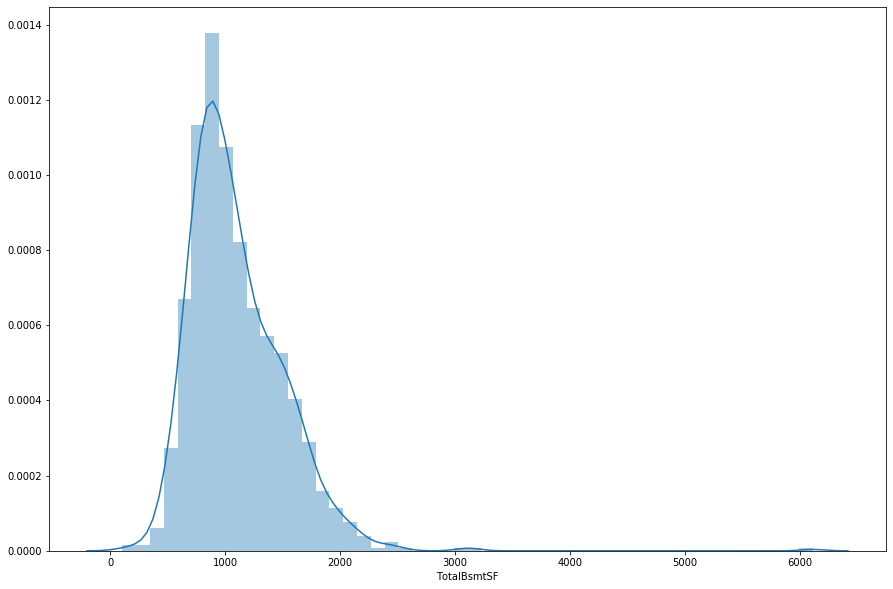

In [31]:
dist_plot(df,'TotalBsmtSF')

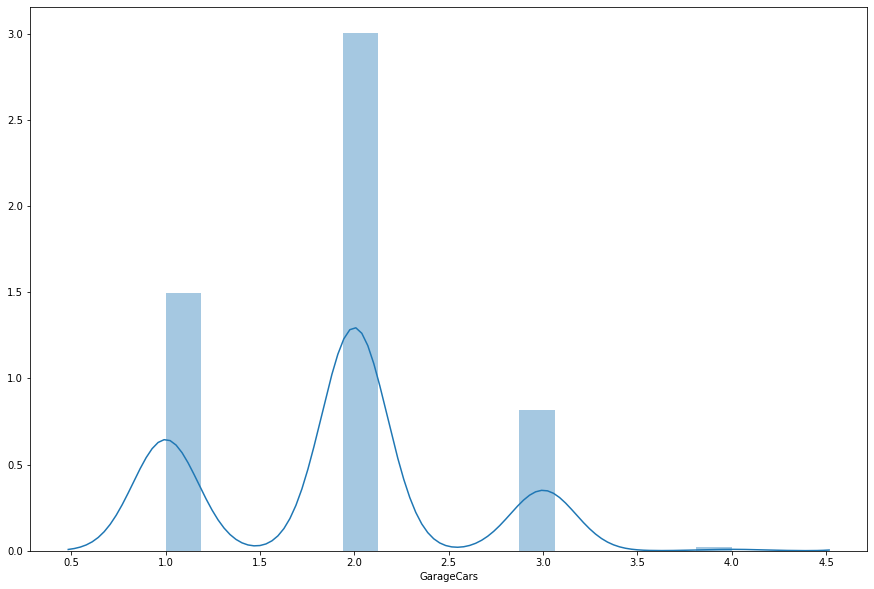

In [32]:
dist_plot(df,'GarageCars')

In [34]:
count('SaleCondition')

Normal     880
Partial    119
Abnorml     70
Family      18
Alloca       6
AdjLand      1
Name: SaleCondition, dtype: int64

Most properties are in normal conditions. at the second we have partial with 119 properties

# Machine Learning

let's get a list of all categorical columns:

In [35]:
list_cat=df.select_dtypes(include=['object', 'category']).columns

In [36]:
df=pd.get_dummies(data=df, columns=list_cat)

In [37]:
X=df[['SalePrice']]
Y=df.loc[:, df.columns != 'SalePrice']

Let's split the data to train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Let's check the regressor parameters:

In [40]:
# intercept:
print(regressor.intercept_)
# slope:
print(regressor.coef_)

[ 7.56077968e+02  6.55581402e+01  5.05062186e+01  4.70615826e+03
  3.77228886e+00  5.89065661e+00  1.93647148e+03  1.96221725e+03
 -1.00934110e+02  5.83834453e+01  5.59546007e+01  3.98208247e+02
  5.12546293e+02  6.25593241e+02  4.57346532e+01  4.64573862e+00
  6.75973633e+02  1.92416397e-01  6.82655449e-02  8.81003633e-01
  7.81750758e-02  2.54515820e+00  1.07126944e+00  4.48507546e+00
 -6.95335403e-02  1.94981795e+03  9.22245266e-01  2.36745801e+02
  7.66684987e+00 -4.25859024e+00  4.43994482e+01  6.00471046e-01
  3.56678857e+00 -7.39433111e+00  2.86784352e+01  5.96380444e+00
  2.00778464e+03  3.08148760e-02  1.04290628e-02  2.38128204e-02
  5.26332602e-01  4.08610638e-01  9.60244029e-03  9.90397560e-01
 -1.25876399e-02 -1.44453353e-02 -8.46383127e-06  1.02704144e+00
  8.41616804e-02  5.63364503e-04 -2.61496161e-03  9.17889917e-01
  1.00000000e+00  1.59968555e-01 -3.60834071e-02  2.09894538e-02
  1.32497390e-03  8.53800424e-01  9.51492598e-01  4.44952655e-02
  4.01213666e-03  1.40866

Lets predict the values for the test data set. 

In [41]:
y_pred = regressor.predict(X_test)

Lets check the metrics

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22.442868533150147
Mean Squared Error: 100053.10277741338
Root Mean Squared Error: 316.31171773649703


Root mean square shows that our model is not very accurate however it provides some insights how sale price would change with multiple variables we have in the data set. This is mainly because the data set is non-linear. We can use various non-linear models such as random forest regressor or deep learning such as RNN/LSTM to build a more accurate model. 

In [43]:
from sklearn.ensemble import RandomForestRegressor
reg_rfc=RandomForestRegressor(n_estimators=10,random_state=0)
reg_rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [44]:
pred=reg_rfc.predict(X_test)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 27.550825691133397
Mean Squared Error: 173707.10322833035
Root Mean Squared Error: 416.7818412890974


It seems that all metrics increased using random forest! We might need to do some grid search to tune hyper parameters. Due to the lack of time, I just ignore doing hyperparameters tuning and assume that linear regression performed better than random forest regressor!

# Prediction for Test dataset

In [46]:
test=pd.read_csv('test.csv')

In [47]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
test.shape

(1459, 80)

In [49]:
test.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],inplace=True)

In [50]:
test.fillna(0,inplace=True)

In [51]:
list_cat=test.select_dtypes(include=['object', 'category']).columns

In [52]:
test=pd.get_dummies(data=test, columns=list_cat)

Now we need to check if we have the same dummy variables in test data set as the ones in the train data set

In [53]:
def add_missing_dummy_columns( df, columns ):
    missing_cols = set( columns ) - set( df.columns )
    for c in missing_cols:
        df[c] = 0

In [54]:
def fix_columns( df, columns ):  

    add_missing_dummy_columns( df, columns )

    # make sure we have all the columns we need
    assert( set( columns ) - set( df.columns ) == set())

    extra_cols = set( df.columns ) - set( columns )
    if extra_cols:
        print ("extra columns:", extra_cols)

    df = df[ columns ]
    return df.head()

In [55]:
fix_columns(test,df.columns)

extra columns: {'GarageType_0', 'BsmtFinType2_0', 'Heating_Wall', 'Utilities_0', 'BsmtQual_0', 'Foundation_Slab', 'Functional_0', 'MasVnrType_0', 'MSZoning_0', 'Functional_Sev', 'BsmtFinType1_0', 'ExterCond_Po', 'GarageCond_0', 'Exterior1st_0', 'RoofStyle_Shed', 'GarageFinish_0', 'SaleType_0', 'KitchenQual_0', 'Exterior1st_AsphShn', 'Exterior2nd_0', 'BsmtExposure_0', 'GarageQual_0', 'BsmtCond_0'}


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_A

In [ ]:
test_pred=regressor.predict('test')